In [1]:
%run analysis_functions.ipynb

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


# Analysis 

## Comparasion of the same policie changing the size of the input matrix

The first analyses describe all the process comparing different policies and selected the best but only using one type of input variables, the others notebooks apply the same process but changing the size of the input variables. There are 3 sizes with 3, 2, and 1 squares of radius.

In all the notebooks the third policie had a remarkably behavior among the others so I'll be using it to compare only how the amount of input variables (changing the binary map size) affect the results for the same policy. Like I'll be using the exactly same tests, there's no need to repeat the same explanation. at the last part I'll be writing the conclussions.

<p align="center">
  <img src="https://github.com/AndresRubianoM/snakeGameDeepLearning/blob/master/binaryMap.png" alt="binary map"/>
</p>

In [2]:
SNAKE_GAMES_3 = [SnakeAI([30,30],3)]
SNAKE_GAMES_2 = [SnakeAI([30,30],2)]
SNAKE_GAMES_1 = [SnakeAI([30,30],1)]

In [3]:
REWARDS = [{
            'aprox': [1,0],
            'eat':[10,0],
            'dead':[-100, 0]
            },
            {
            'aprox': [1,0],
            'eat':[10,0],
            'dead':[-10, 0]
            },
            {
            'aprox': [1,-1],
            'eat':[10,0],
            'dead':[-100, 0]
            },
            {
            'aprox': [3,-1],
            'eat':[10,0],
            'dead':[-100, 0]
            },
            {
            'aprox': [1,0],
            'eat':[20,0],
            'dead':[-10, 0]
            },
            {
            'aprox': [3,-1],
            'eat':[20,0],
            'dead':[-10, 0]
            },
    ]

In [4]:
paths_3 = paths_to_data(SNAKE_GAMES_3, REWARDS)
paths_2 = paths_to_data(SNAKE_GAMES_2, REWARDS)
paths_1 = paths_to_data(SNAKE_GAMES_1, REWARDS)

## Maximum size matrix

### Data from training 

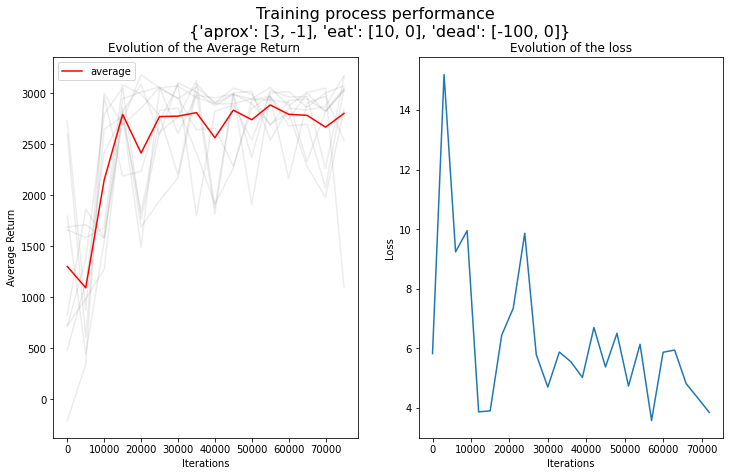

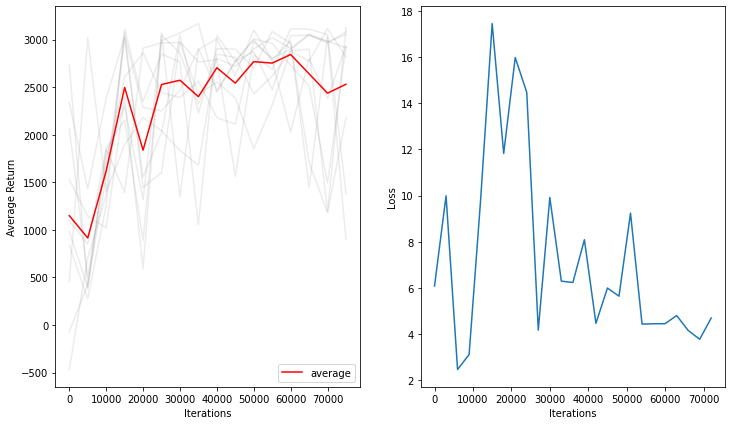

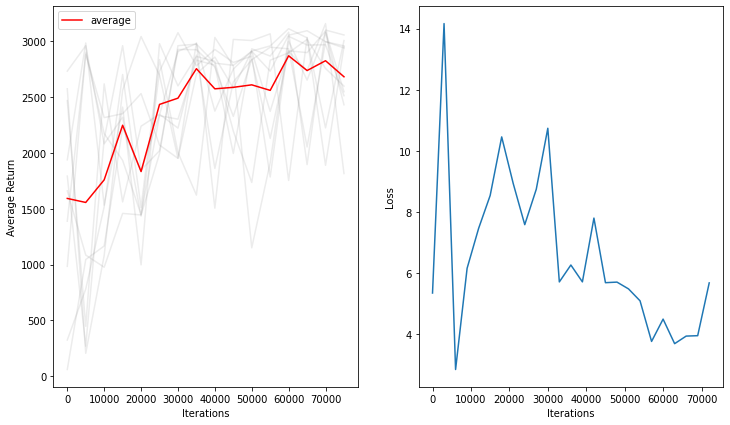

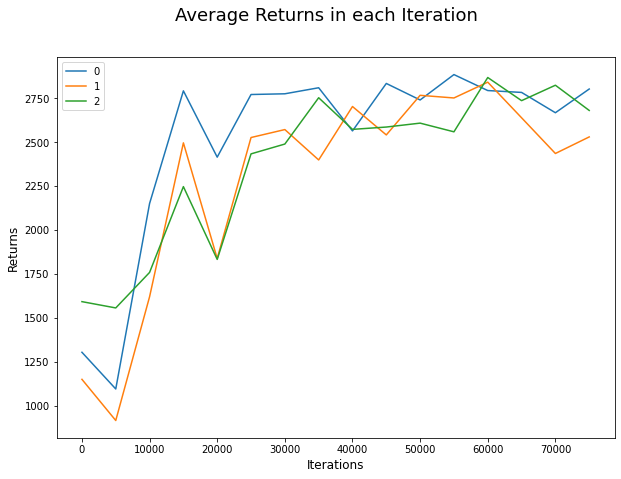

In [6]:
general_sample_visualization(paths_3, 3)
average_comparative(paths_3, 3)

### Samples of each iteration

In [8]:
games_3 = sampler(SNAKE_GAMES_3[0], REWARDS[3], 3, 0, 500, True)

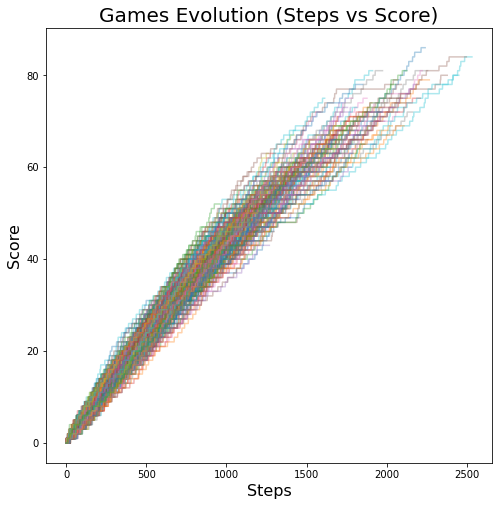

In [9]:
games_3 = deleteStuckGames(games_3)
plotPathGames(games_3)

In [10]:
steps_3, score_3 = stepsScoreValues(games_3)

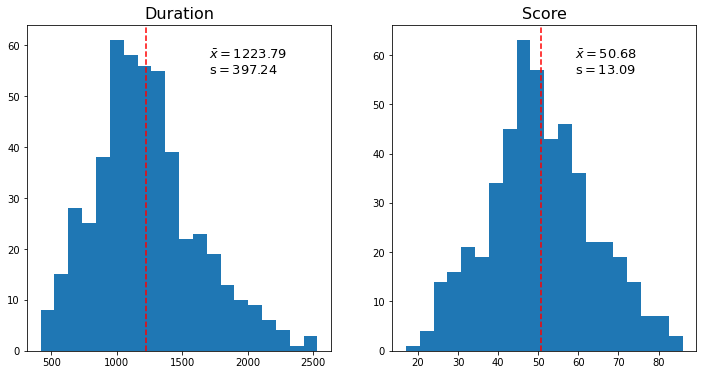

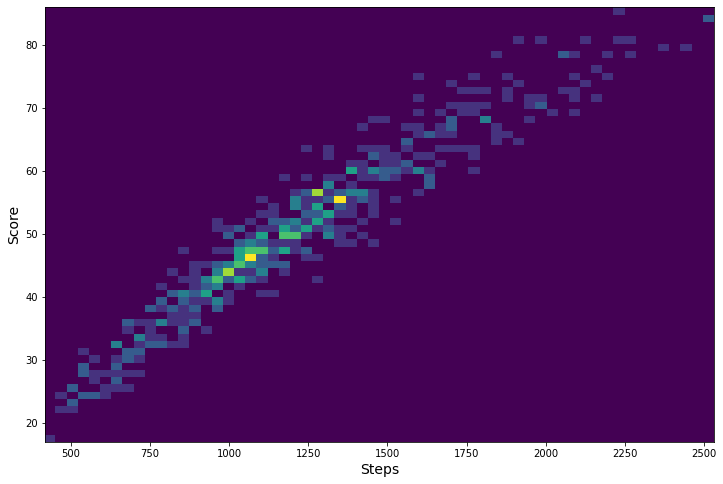

In [11]:
response_histogram(steps_3, score_3)

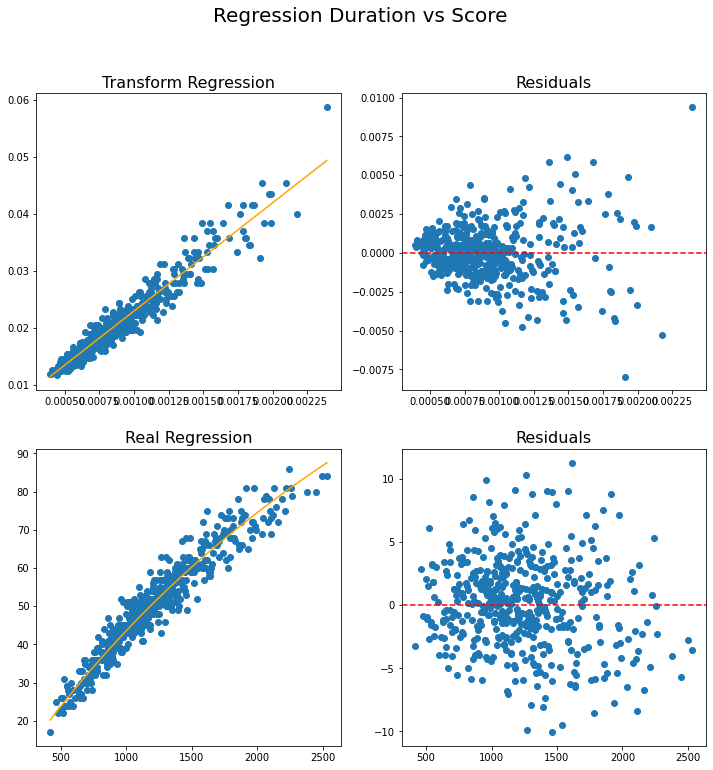

In [12]:
transform_3, real_3, x_3 = transformRegression(steps_3,score_3)

In [13]:
duration_diff_3 = time_diff(games_3)

In [14]:
duration_diff_3 = delete_outliers(duration_diff_3)

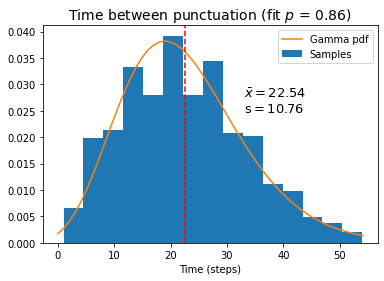

In [15]:
pdf_3 = gamma_aproximation(duration_diff_3)

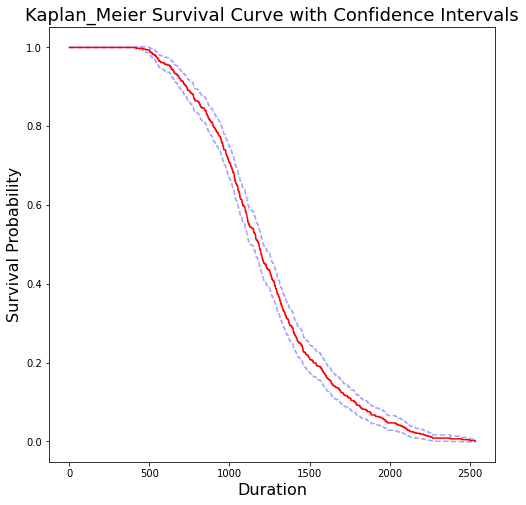

In [16]:
up_3, down_3, probs_3, steps_range_3 = survival_analysis(steps_3)

## Mid size matrix

### Data from training 

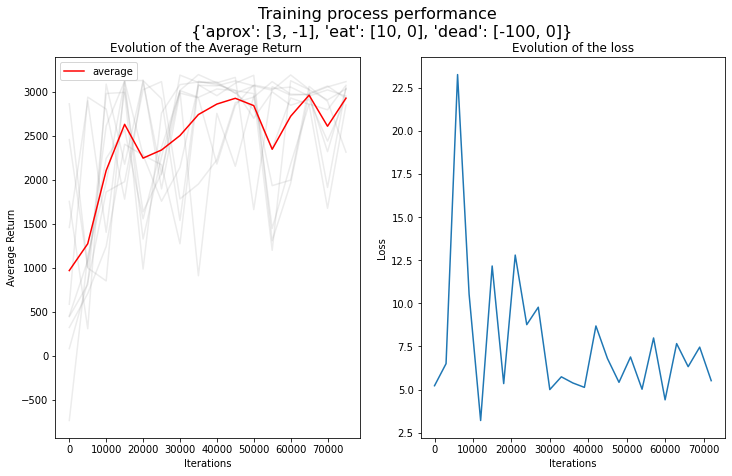

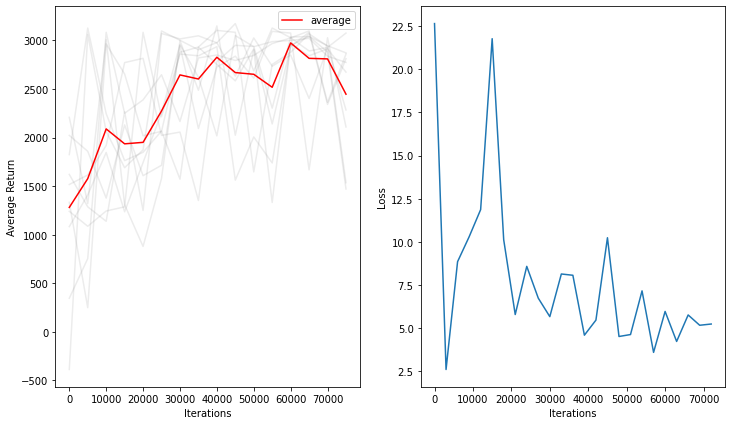

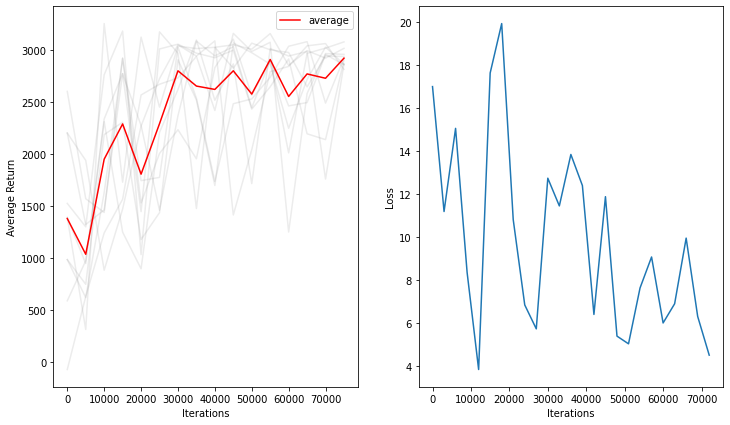

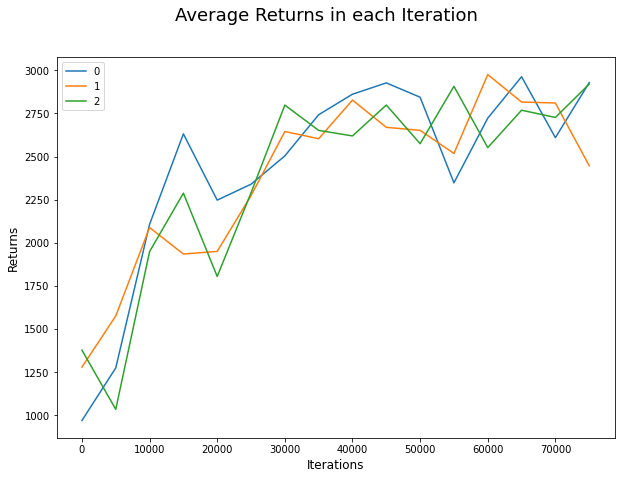

In [17]:
general_sample_visualization(paths_2, 3)
average_comparative(paths_2, 3)

In [18]:
games_4 = sampler(SNAKE_GAMES_2[0], REWARDS[3], 3, 0, 500, True)

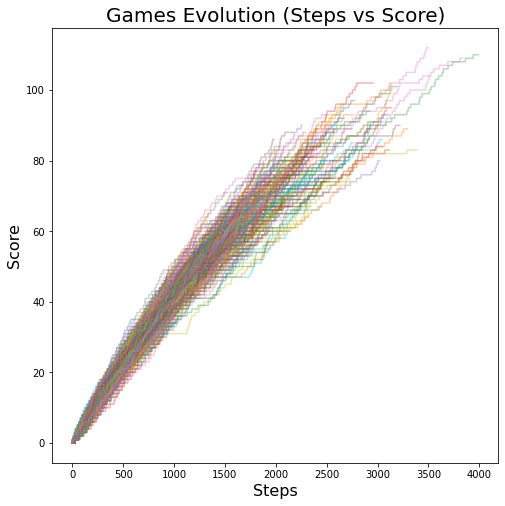

In [37]:
games_4 = deleteStuckGames(games_4)
plotPathGames(games_4)

In [38]:
steps_4, score_4 = stepsScoreValues(games_4)

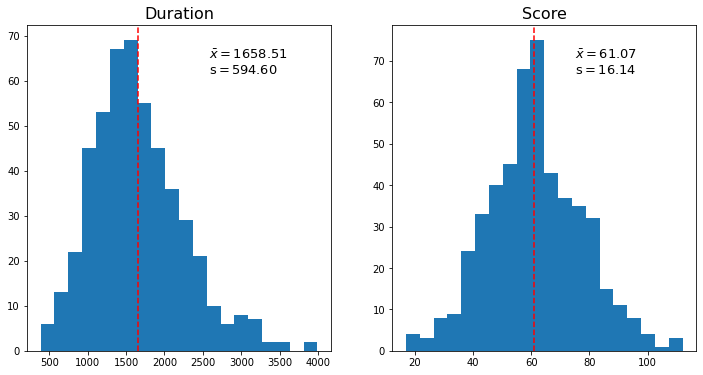

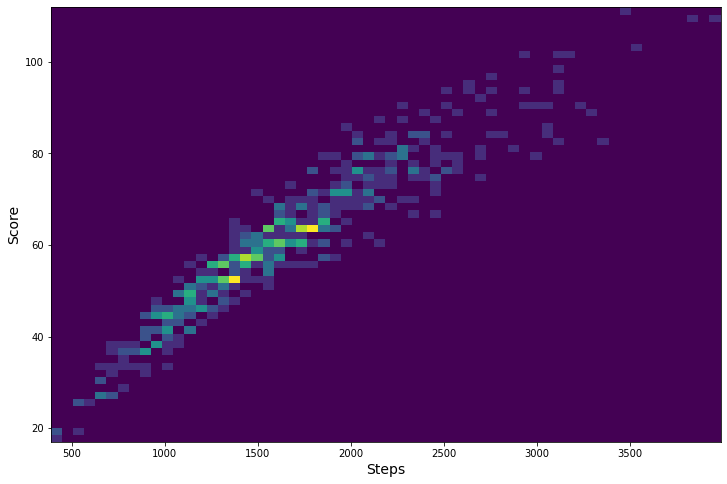

In [39]:
response_histogram(steps_4, score_4)

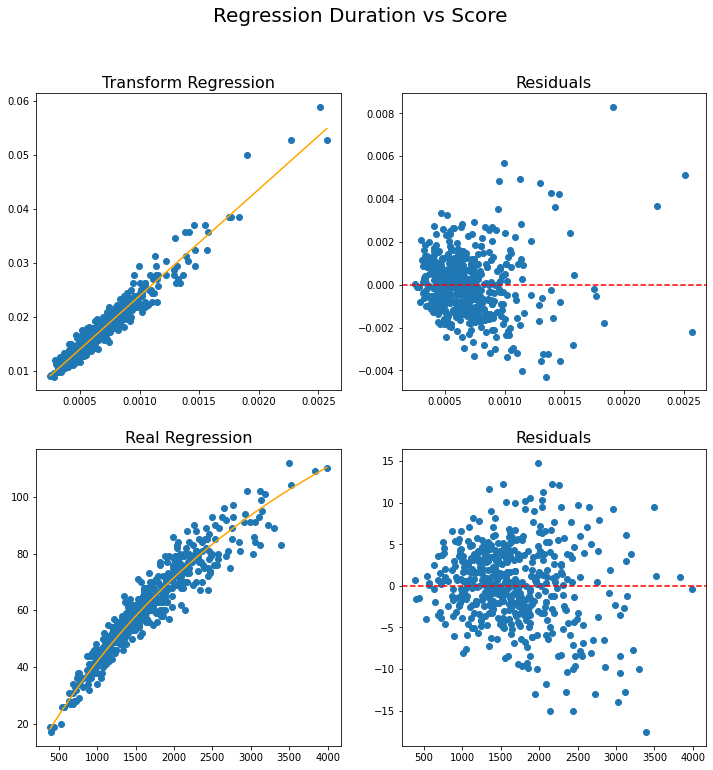

In [40]:
transform_4, real_4, x_4 = transformRegression(steps_4,score_4)

In [41]:
duration_diff_4 = time_diff(games_4)

In [42]:
duration_diff_4 = delete_outliers(duration_diff_4)

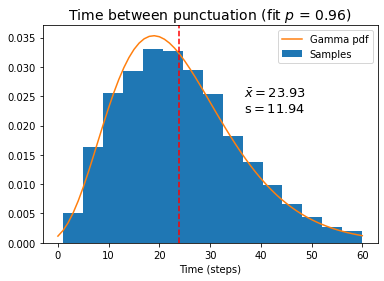

In [43]:
pdf_4 = gamma_aproximation(duration_diff_4)

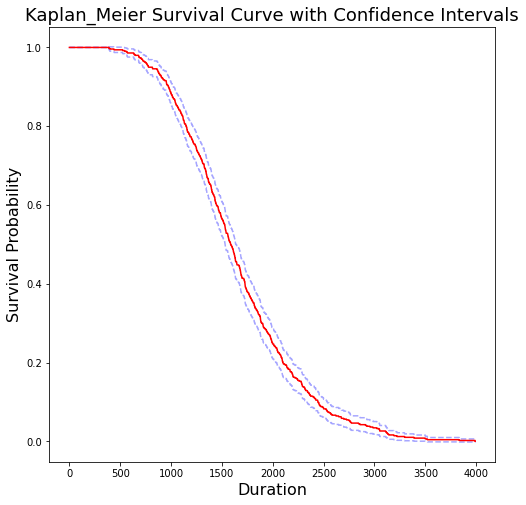

In [44]:
up_4, down_4, probs_4, steps_range_4 = survival_analysis(steps_4)

## Minimum size matrix 

### Data from training 

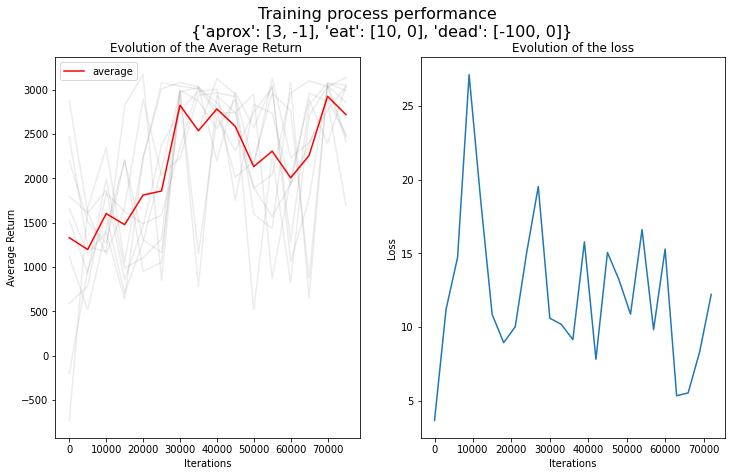

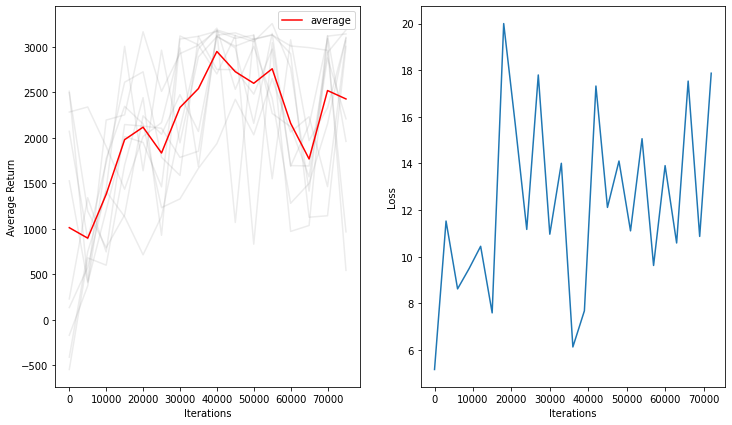

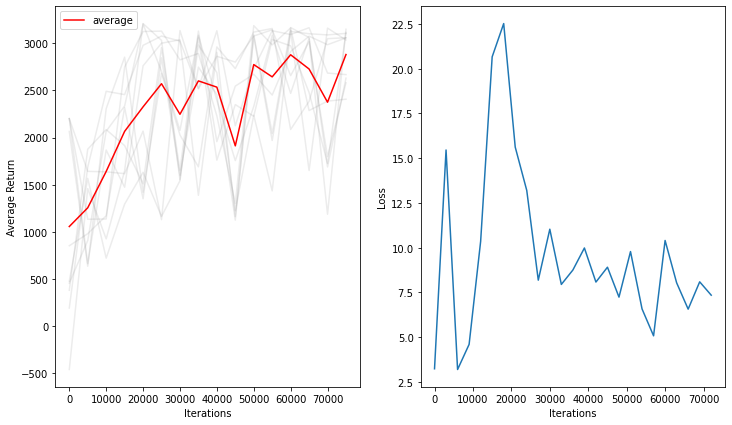

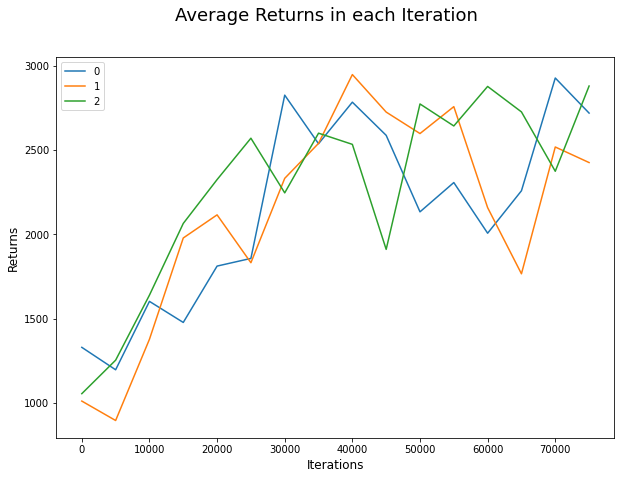

In [27]:
general_sample_visualization(paths_1, 3)
average_comparative(paths_1, 3)

### Samples of each iteration

In [28]:
games_5 = sampler(SNAKE_GAMES_1[0], REWARDS[3], 3, 0, 500, True)

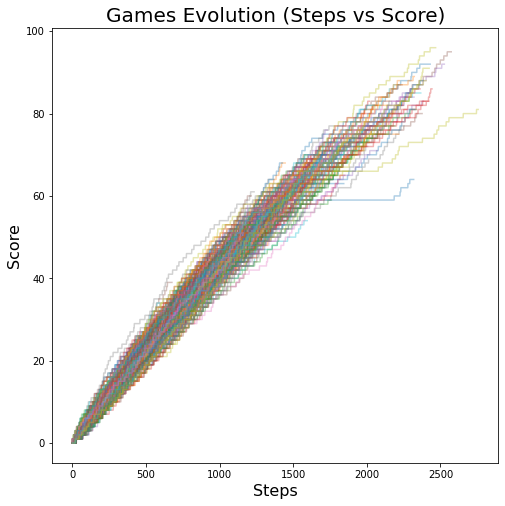

In [29]:
plotPathGames(games_5)

In [30]:
steps_5, score_5 = stepsScoreValues(games_5)

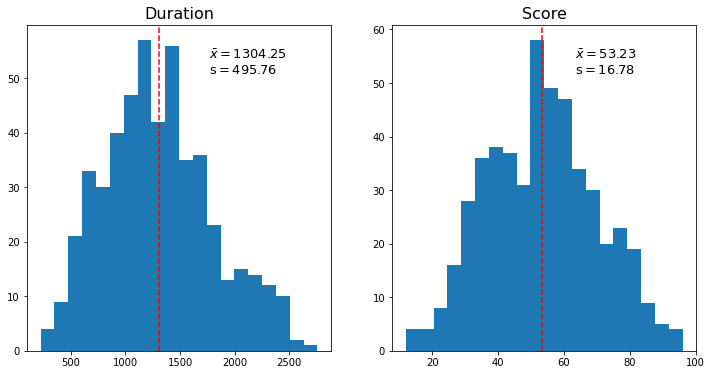

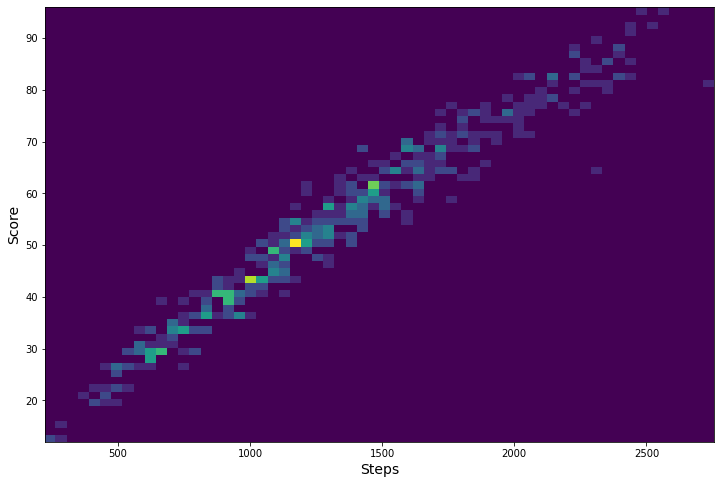

In [31]:
response_histogram(steps_5, score_5)

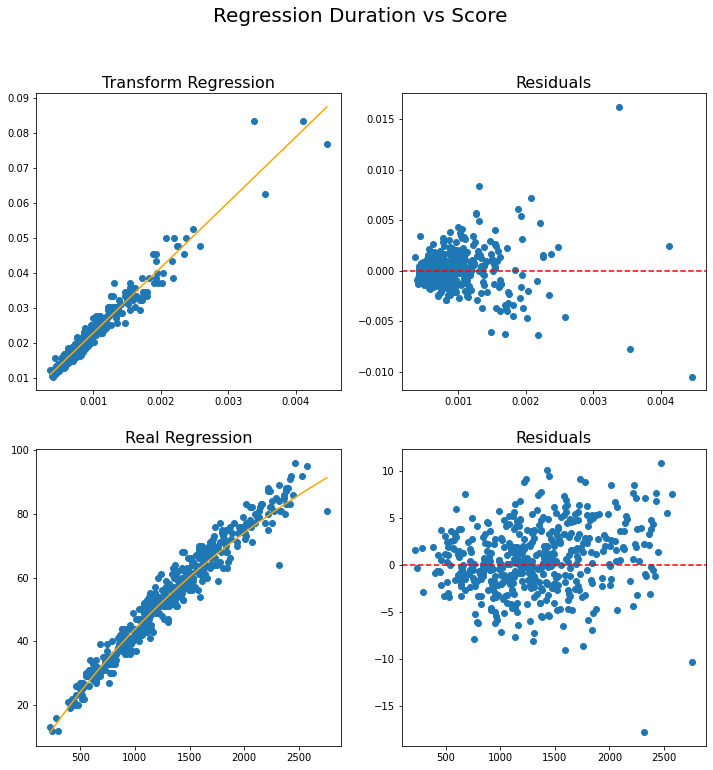

In [32]:
transform_5, real_5, x_5 = transformRegression(steps_5,score_5)

In [33]:
duration_diff_5 = time_diff(games_5)

In [34]:
duration_diff_5 = delete_outliers(duration_diff_5)

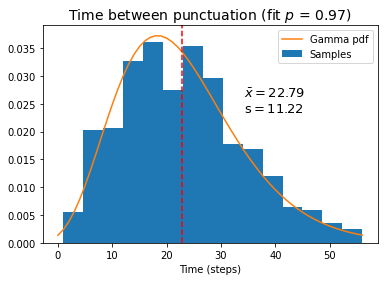

In [35]:
pdf_5 = gamma_aproximation(duration_diff_5)

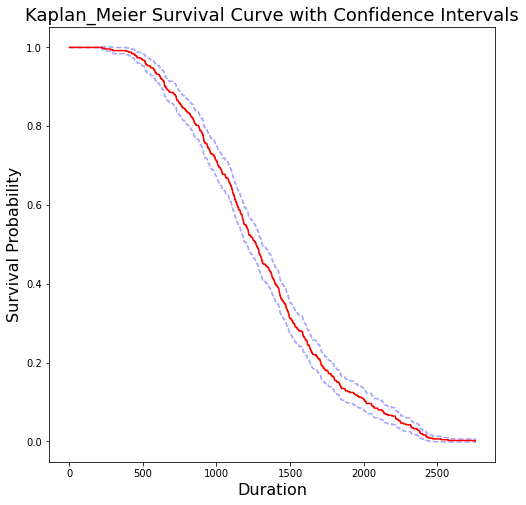

In [36]:
up_5, down_5, probs_5, steps_range_5 = survival_analysis(steps_5)

## Comparation between policies

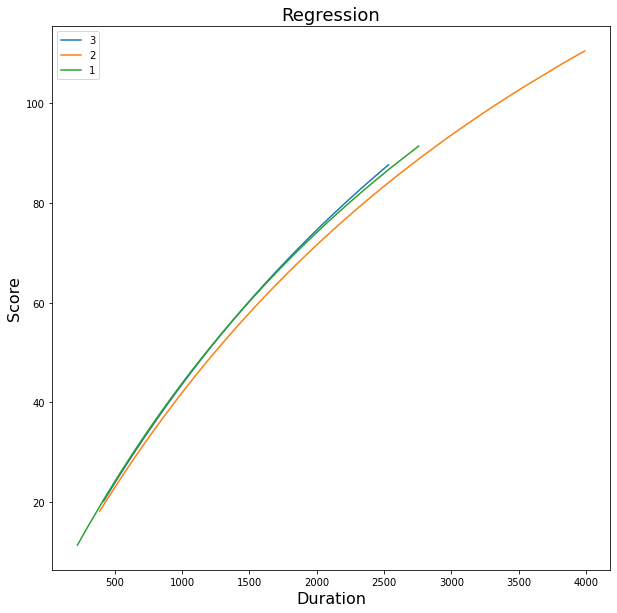

In [49]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(steps_3,real_3, label='3')
ax.plot(steps_4,real_4, label='2')
ax.plot(steps_5,real_5, label='1')
ax.set_title('Regression', fontsize=18)
ax.set_xlabel('Duration', fontsize=16)
ax.set_ylabel('Score', fontsize=16)
ax.legend()

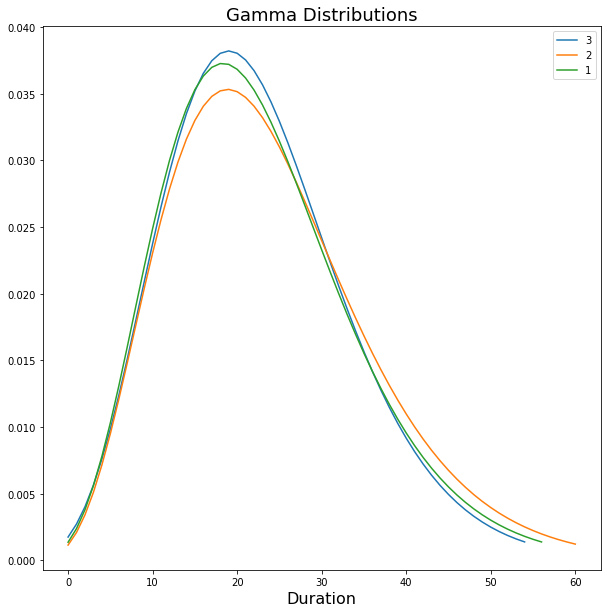

In [50]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(pdf_3, label='3')
ax.plot(pdf_4, label='2')
ax.plot(pdf_5, label='1')
ax.set_title('Gamma Distributions', fontsize=18)
ax.set_xlabel('Duration', fontsize=16)
ax.legend()

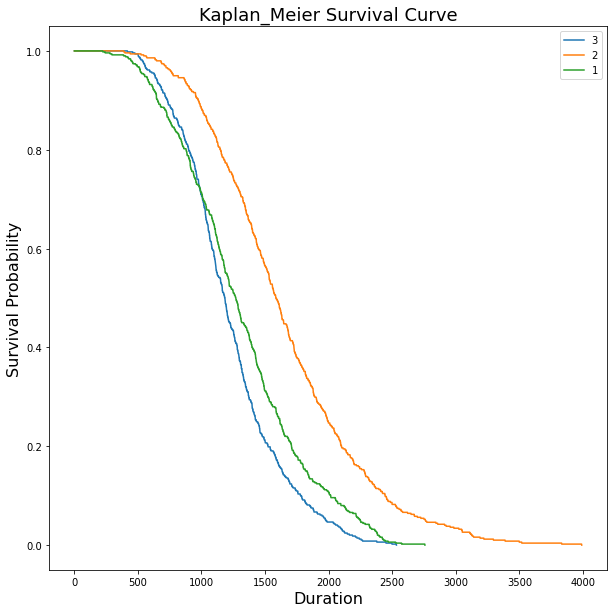

In [51]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(steps_range_3, probs_3, label='3')
ax.plot(steps_range_4, probs_4, label='2')
ax.plot(steps_range_5, probs_5, label='1')
ax.set_title('Kaplan_Meier Survival Curve', fontsize=18)
ax.set_xlabel('Duration', fontsize=16)
ax.set_ylabel('Survival Probability', fontsize=16)
ax.legend()

Usually is common to think that adding more information to a model will lead into a better result but it isn't true in most cases. With this problem, I'll be adding more information that increases the size of the binary map that translates if a space is empty or not, and with these results, we can see how the models react to that change.

One thing I want to remark about the results of this notebook is the data itself, if the reader looks closely the code I've been using to collect the data of the game results doesn't save the data, every time that is executed starts a new simulation. Although this approach isn't efficient demonstrates the consistency of the results, because even using a new set of simulations that are random stills generates the same results (or very similar) statistically. Exactly this is what allows us to generate strong conclusions that follow the scientific process and are reproducible.

Looking at the results of the three analyses the regression and the gamma distribution has similar results, the difference have a minimum of 1.61% between 3 and 1, and a maximum of 5.6% between 3 and 2. Something similar happens with the gamma distribution (comparing the average), but again the survival analysis gives us the definitive result to take a decision. The model with a radius of 2 is far more efficient than the other two having a maximum difference around 42%. Taking the 20% as reference meanwhile, the best model endures more than 2000 steps the others endures about 1500 steps, using the regression we can have an approximation of the score that each model could get with 2000 steps the model of radius 2 could get nearly to 75 points and the other models could has around 60 points with 1500 steps. If we take a reference not the probability but the steps specifically 1500 steps the best model have a survival probability near 55% and a score around 58 points. with these results, we can finally guarantee the advantage of the model with 2 square of radius and the third policy.